# Домашнее задание к занятию «Классификация: Логистическая регрессия и SVM»

**Цель:** изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.

**Описание задания:**

В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv. Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т.д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке. Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

# 1. Получите данные и загрузите их в рабочую среду.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# 2. Проведите первичный анализ.
Проверьте данные на пропуски. Удалите в случае обнаружения.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
# проверка на Nan
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# 3. Постройте 1-2 графика на выбор.
Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

In [5]:
# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

<Axes: xlabel='gender'>

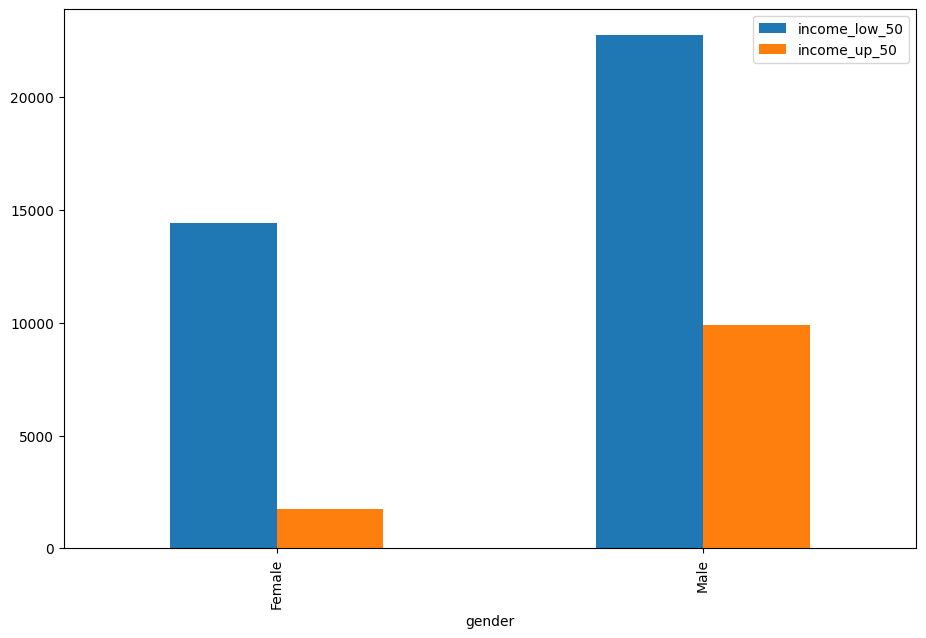

In [6]:
data1 = data[data.income == '<=50K']
data1 = data1[['gender', 'income']].groupby('gender').count()
data2 = data[data.income == '>50K']
data2 = data2[['gender', 'income']].groupby('gender').count()
res = data1.merge(data2, on=['gender'])
res.columns = ['income_low_50', 'income_up_50']
res.reset_index(inplace=True)
res.plot(x='gender', kind='bar')

<Axes: xlabel='race'>

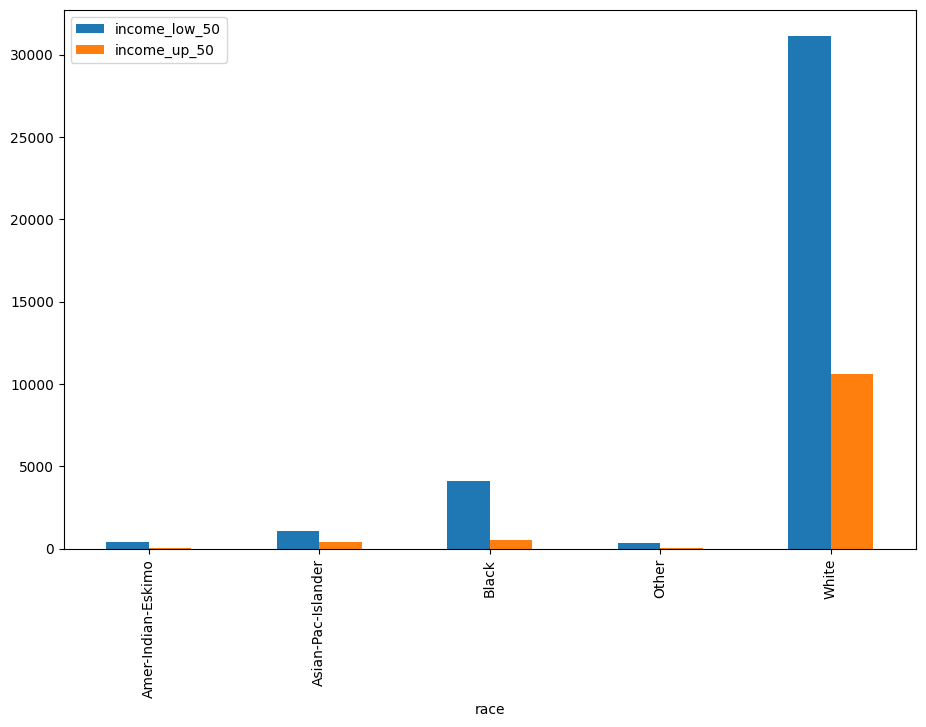

In [7]:
data1 = data[data.income == '<=50K']
data1 = data1[['race', 'income']].groupby('race').count()
data2 = data[data.income == '>50K']
data2 = data2[['race', 'income']].groupby('race').count()
res = data1.merge(data2, on=['race'])
res.columns = ['income_low_50', 'income_up_50']
res.reset_index(inplace=True)
res.plot(x='race', kind='bar')

<Axes: xlabel='marital-status'>

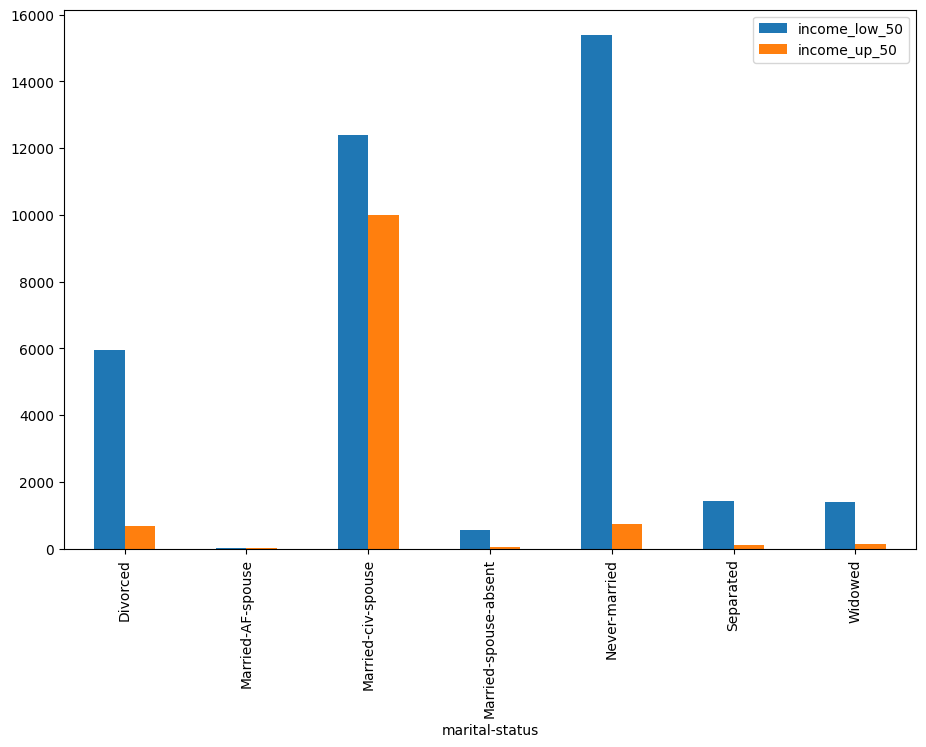

In [8]:
data1 = data[data.income == '<=50K']
data1 = data1[['marital-status', 'income']].groupby('marital-status').count()
data2 = data[data.income == '>50K']
data2 = data2[['marital-status', 'income']].groupby('marital-status').count()
res = data1.merge(data2, on=['marital-status'])
res.columns = ['income_low_50', 'income_up_50']
res.reset_index(inplace=True)
res.plot(x='marital-status', kind='bar')

# 4. Преобразуйте категориальные признаки.

In [9]:
#выберем признаки, по которым будем обучать модель
selectedColumns = data [['gender', 'race', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']]
# переведем категориальные признаки в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies (selectedColumns, columns = ['gender', 'race'])
#удалим столбец с целевой переменной
del X['income']
X.head()

,capital-gain,capital-loss,hours-per-week,gender_Female,gender_Male,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0,0,40,0,1,0,0,1,0,0
1,0,0,50,0,1,0,0,0,0,1
2,0,0,40,0,1,0,0,0,0,1
3,7688,0,40,0,1,0,0,1,0,0
4,0,0,30,1,0,0,0,0,0,1


In [10]:
#целевая переменная - категориальная
#переведем значения столбца в числа, оставив один столбец
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
le.fit( data['income'])

LabelEncoder()

In [12]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [13]:
# записываем в таргетную переменную y преобразованный столбец
y = pd.Series (data = le.transform(data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

# 5. Разделите выборку на обучающее и тестовое подмножество.
80% данных оставить на обучающее множество, 20% на тестовое.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#поделим данные на обучающую выборку и тестовую
#указываем в test_size долю датасета, которая пойдет на тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Обучите модели логистической регрессии и опорных векторов на обучающем множестве.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [19]:
model = LogisticRegression()

In [20]:
#обучаем на части датасета (train)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [21]:
predictions[:5] # посмотрим как выглядят наши предсказания

array([0, 0, 1, 0, 0])

In [22]:
model.predict(X_test) # получаем массив

array([0, 0, 1, ..., 0, 0, 0])

In [23]:
model.predict_proba(X_test)

array([[0.90575386, 0.09424614],
       [0.75038303, 0.24961697],
       [0.0640738 , 0.9359262 ],
       ...,
       [0.91143776, 0.08856224],
       [0.85017435, 0.14982565],
       [0.77250665, 0.22749335]])

# 7. Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей.
Для этого используйте встроенную функцию score.

In [24]:
#получаем наш скор (точность предсказания) на обучающей и тестовой выборках
model.score(X_train, y_train)

0.800885521971694

In [25]:
model.score(X_test,y_test)

0.8063261336881974

In [27]:
#метод опорных векторов, SVM
from sklearn.svm import SVC

In [28]:
# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [29]:
#получаем наш скор, для обучающей и тестовой выборок
clf.score(X_train, y_train)

0.8109180252348169

In [30]:
clf.score(X_test, y_test)

0.8148223973794656

In [31]:
#без StandardScaler
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [32]:
svc.score(X_train, y_train)

0.8327233639597676

In [33]:
svc.score(X_test, y_test)

0.8323267478759341

# 8. Сформулируйте выводы по проделанной работе.
Кратко опишите какие преобразования были сделаны с данными. Сравните точность двух моделей. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

**ВЫВОД**:

Перед построением модели данные были проверены на пропуски, а категориальные переменные были преобразованы в числовые.
Точность модели достаточно хорошая и на обучаемой, и на тестовой выборках. Метод опорных векторов позволил улучшить точность модели, особенно в случае без масштабирования (StandardScaler).